# 光学系统分析
## 光路网络
序列光学分析效率高，非序列光学则更适用于分布式合成孔径系统。我们采用有向无圈图（Directed acyclic graph, DAG）建立光路网络模型，作为序列光学分析的广义形式。

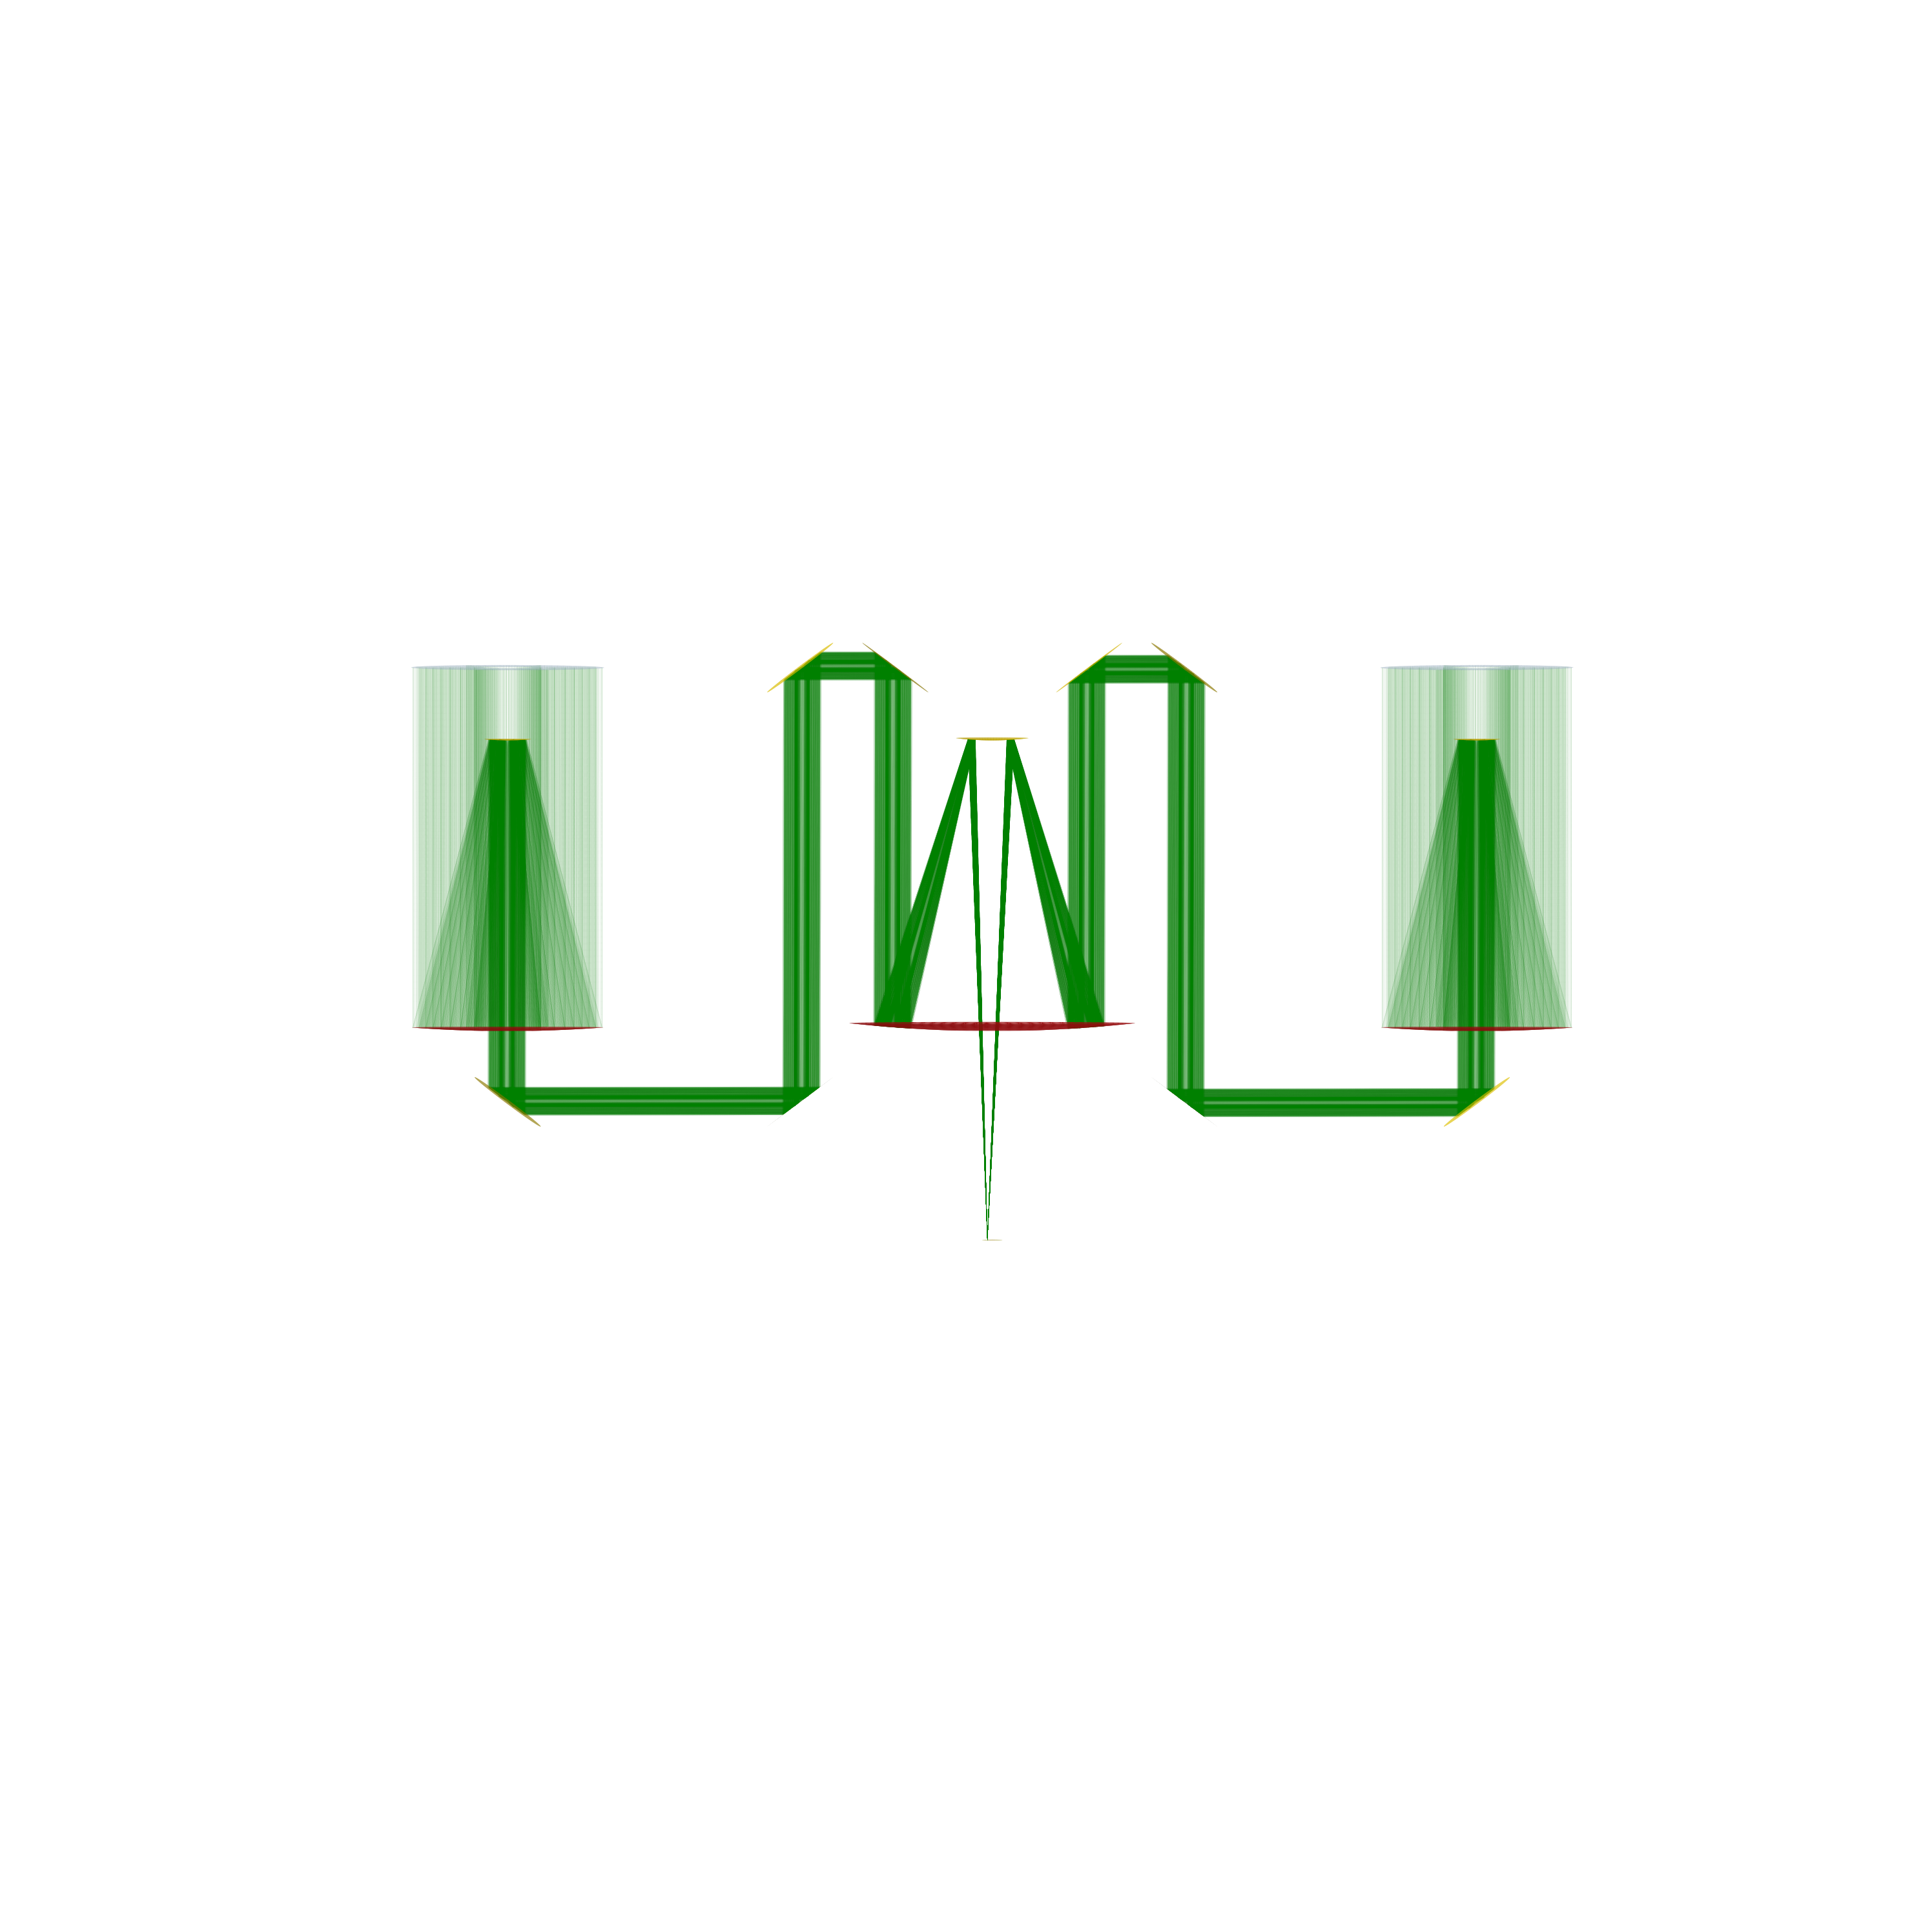

In [173]:
import pimms.optics as op
reload(op)
# 创建简化的迈克尔逊恒星干涉仪模型，初始基线10米
sim=op.SIM(init_b=10.)
# 创建天顶无穷远光源
src=op.LightSource((0., np.deg2rad(1./60.), np.inf))
# 创建光路网络，并以上述光源作为参考光源，通过非序列光线追踪，确定光路，创建光路网络
opn=op.OpticalPathNetwork(sim, light_source=src)
p,q=src(sim.get_entrance(), 200, 1, sampling='crosshair')
pt,mt=sim.trace_network(q,opn)
tris,zs,extent=sim.draw(draw_virtual=True,view_angles=(0,-90),figure_size=(3000,3000),raytrace=pt)

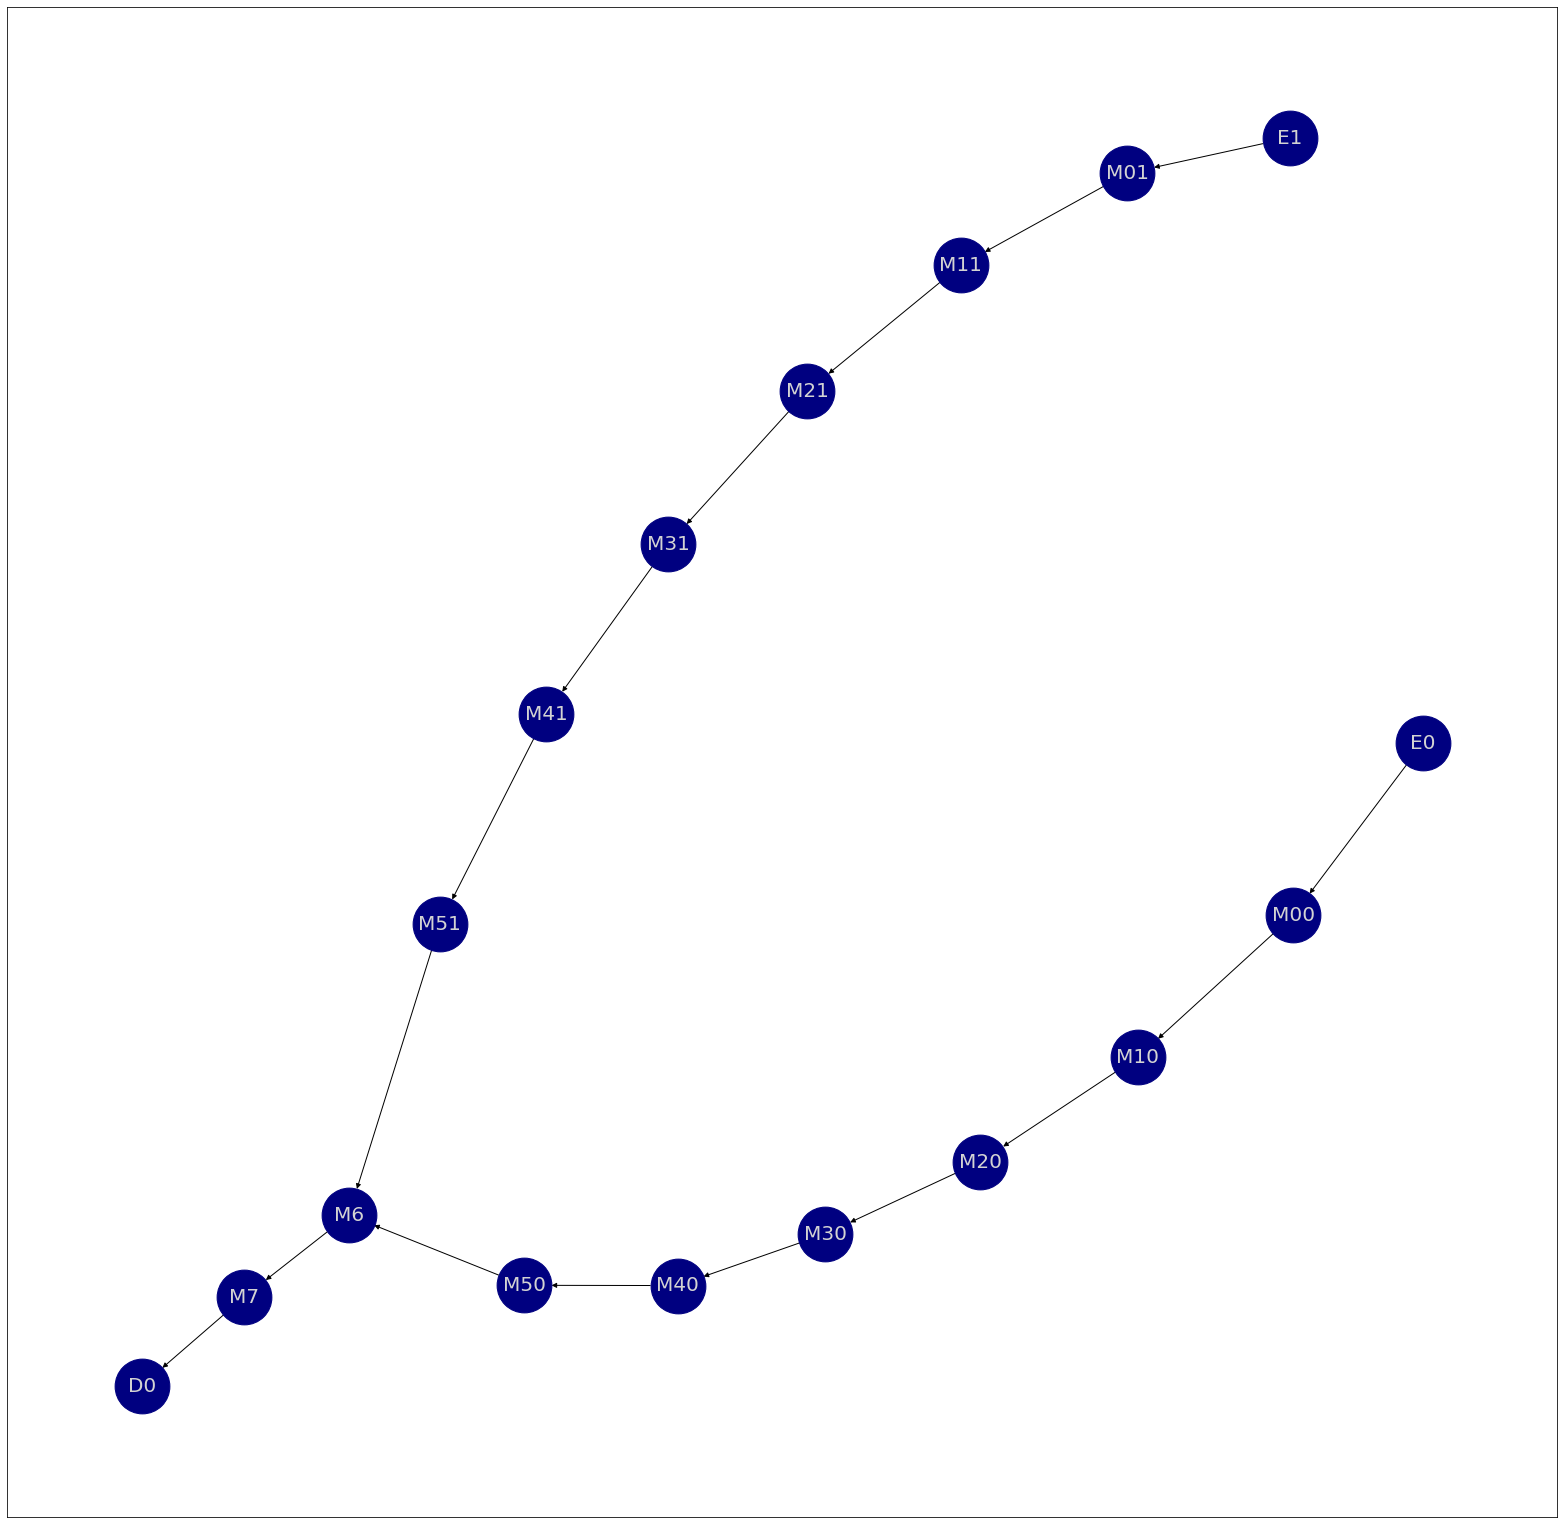

In [147]:
opn.draw(figure_size=(2000,2000),node_size=3000,font_size=20)

建立光路网络后，基于网络进行光线追踪，相比非序列光线追踪，可大幅度提升效率。

In [174]:
%timeit sim.trace(q)
%timeit sim.trace_network(q,opn)
pt0,mt0=sim.trace(q)
pt1,mt1=sim.trace_network(q,opn)

1.26 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
247 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 确定系统光阑

In [143]:
reload(op)
p=pt1['position'][2,mt1[2,:]==1]
q=pt1['position'][9,(mt1[2,:]==1)&(mt1[9,:]==11)]
print(p.shape)
print(q.shape)
u0,v0,T,rms=op.find_chiefray(p[:,0]-np.mean(p[:,0]),p[:,1]-np.mean(p[:,1]),q[:,0],q[:,1])

(3176, 3)
(3176, 3)


In [169]:
type(id(sim))

int

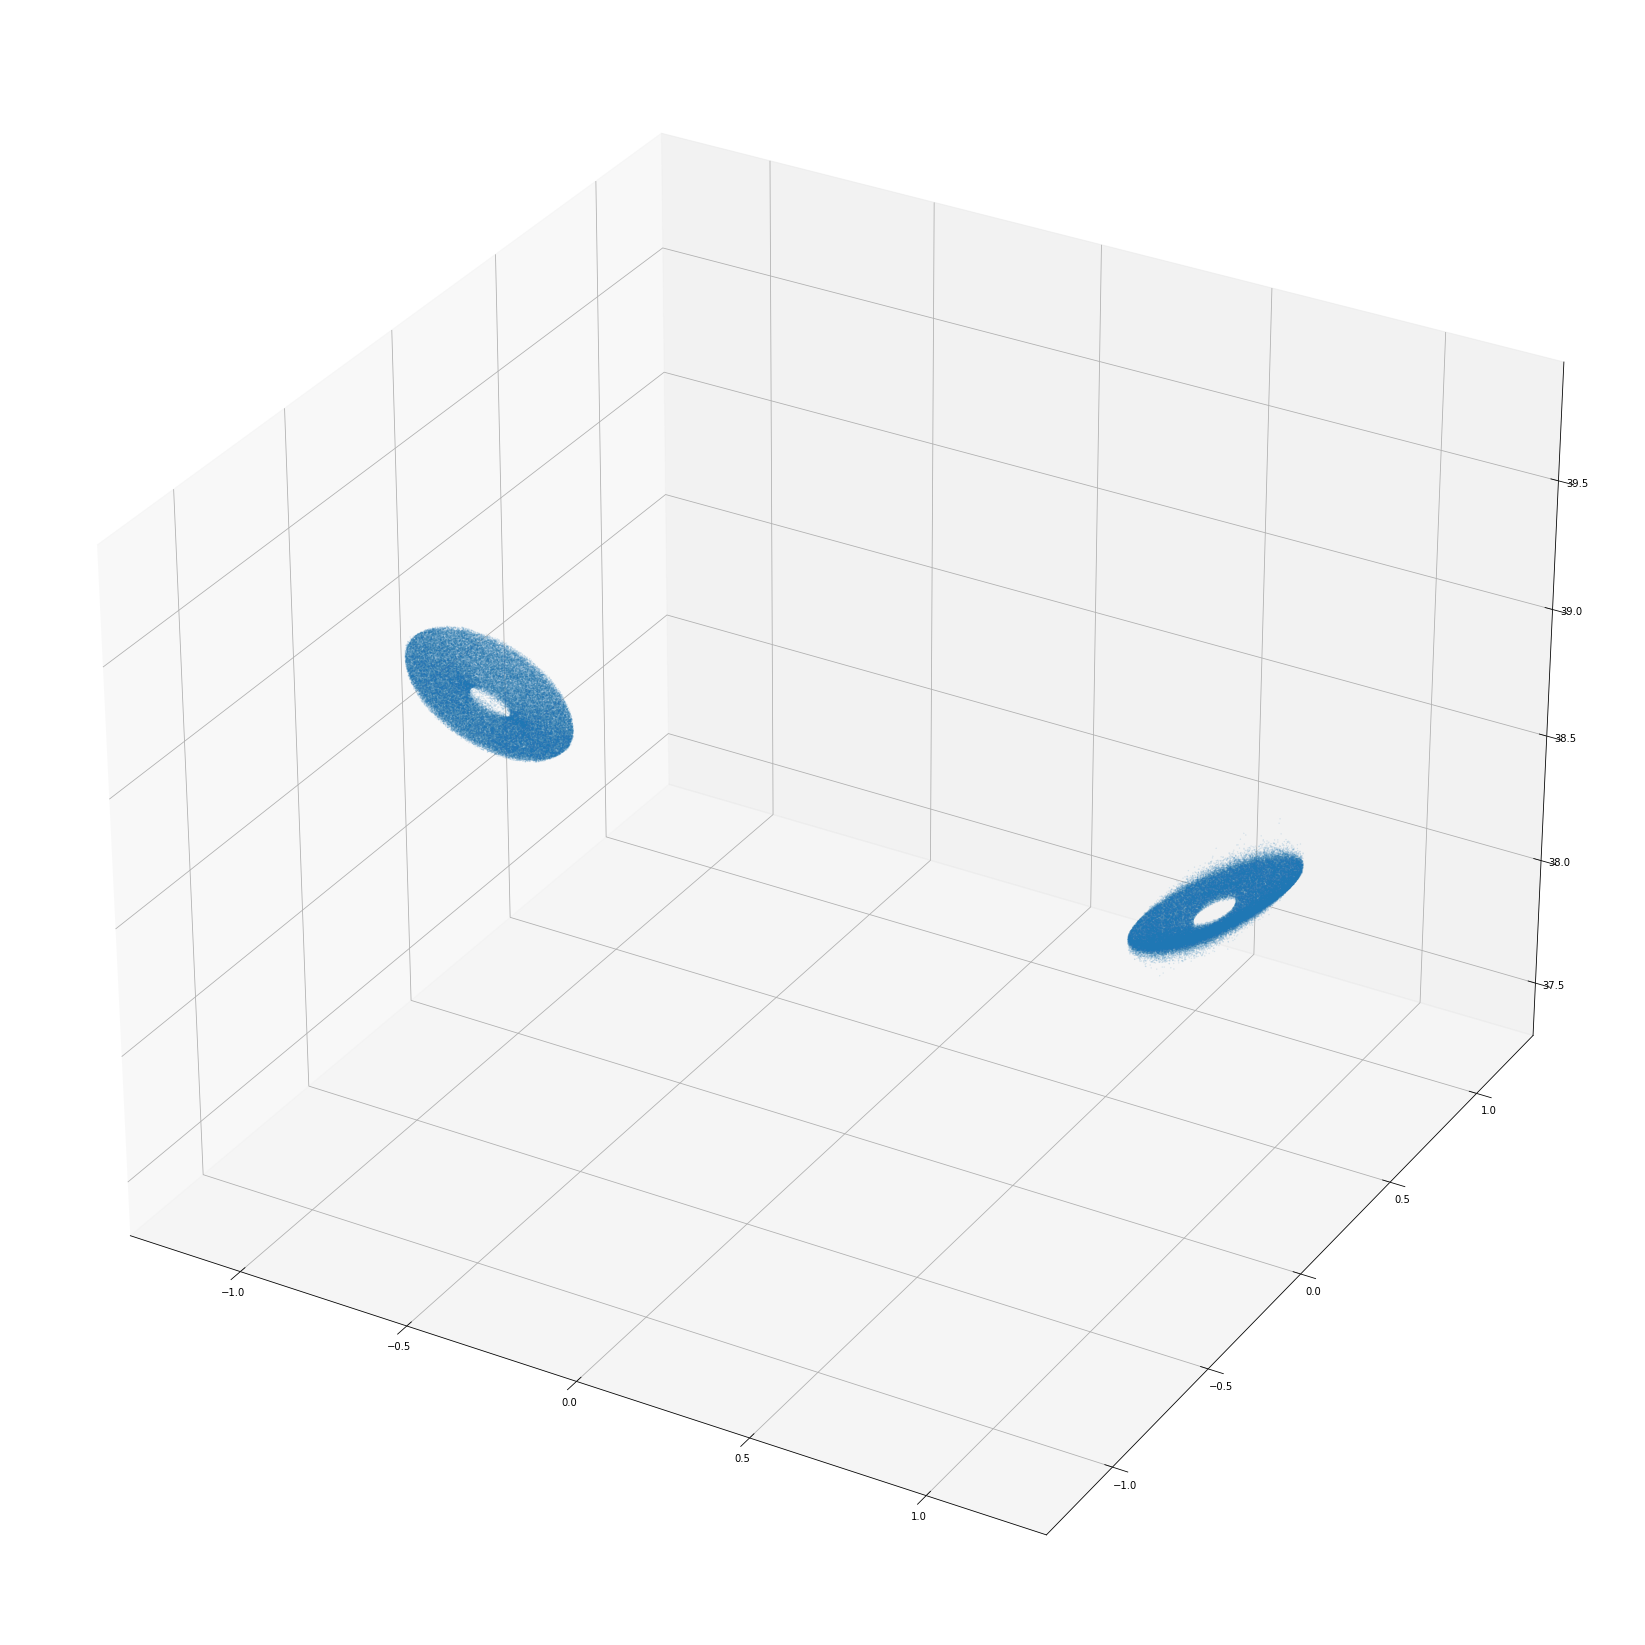

In [765]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
extent=max(np.max(n[:,0])-np.min(n[:,0]), np.max(n[:,1])-np.min(n[:,1]), np.max(n[:,2])-np.min(n[:,2]))
ax.set_xlim([np.mean(n[:,0])-extent/2.,np.mean(n[:,0])+extent/2.])
ax.set_ylim([np.mean(n[:,1])-extent/2.,np.mean(n[:,1])+extent/2.])
ax.set_zlim([np.mean(n[:,2])-extent/2.,np.mean(n[:,2])+extent/2.])
ax.view_init(30,-60)

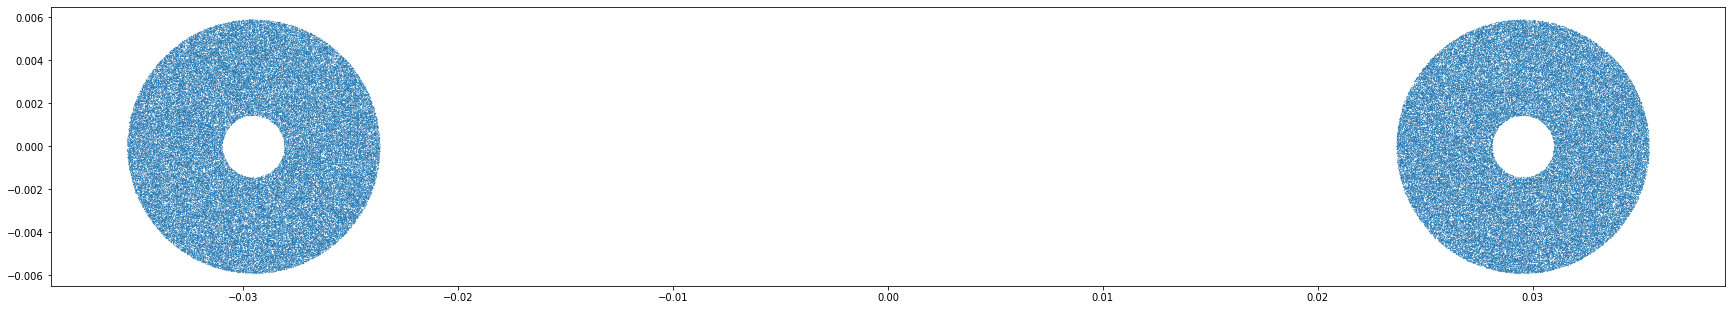

In [757]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
ax.scatter(n[:,0]/(n[:,2]),n[:,1]/(n[:,2]),.1,marker='.')
ax.set_aspect('equal')

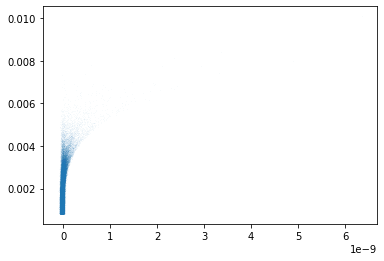

In [729]:
plt.scatter(s,np.rad2deg(theta),.01,alpha=.1)

[[-0.21681595  0.00529846 -0.98997818]
 [-0.21770752  0.02726214 -0.98974344]
 [-0.23554672 -0.00275326 -0.98817907]
 ...
 [ 0.19049286 -0.01846907 -0.99219512]
 [ 0.16537255 -0.00981636 -0.99415266]
 [ 0.18374006 -0.02186447 -0.99270444]]
[[-0.21720781  0.00199413 -0.9899471 ]
 [-0.22027974  0.02523906 -0.98952621]
 [-0.23498615 -0.00598247 -0.98822919]
 ...
 [ 0.19357675 -0.01952491 -0.99193421]
 [ 0.16654139 -0.01286715 -0.99405519]
 [ 0.18659444 -0.0235191  -0.99246317]]
[[ 3.15267007e-02 -3.26264072e-04 -9.99502857e-01]
 [ 3.19458059e-02 -3.68609525e-03 -9.99482805e-01]
 [ 3.41066951e-02  8.32027684e-04 -9.99417851e-01]
 ...
 [-2.80774653e-02  2.82375603e-03 -9.99601762e-01]
 [-2.41825249e-02  1.83571636e-03 -9.99705875e-01]
 [-2.70688359e-02  3.39753881e-03 -9.99627798e-01]]
[[ 3.15310335e-02 -2.89478983e-04 -9.99502731e-01]
 [ 3.19743534e-02 -3.66353581e-03 -9.99481975e-01]
 [ 3.41004336e-02  8.68156983e-04 -9.99418034e-01]
 ...
 [-2.81114936e-02  2.83543570e-03 -9.99600772e-01]

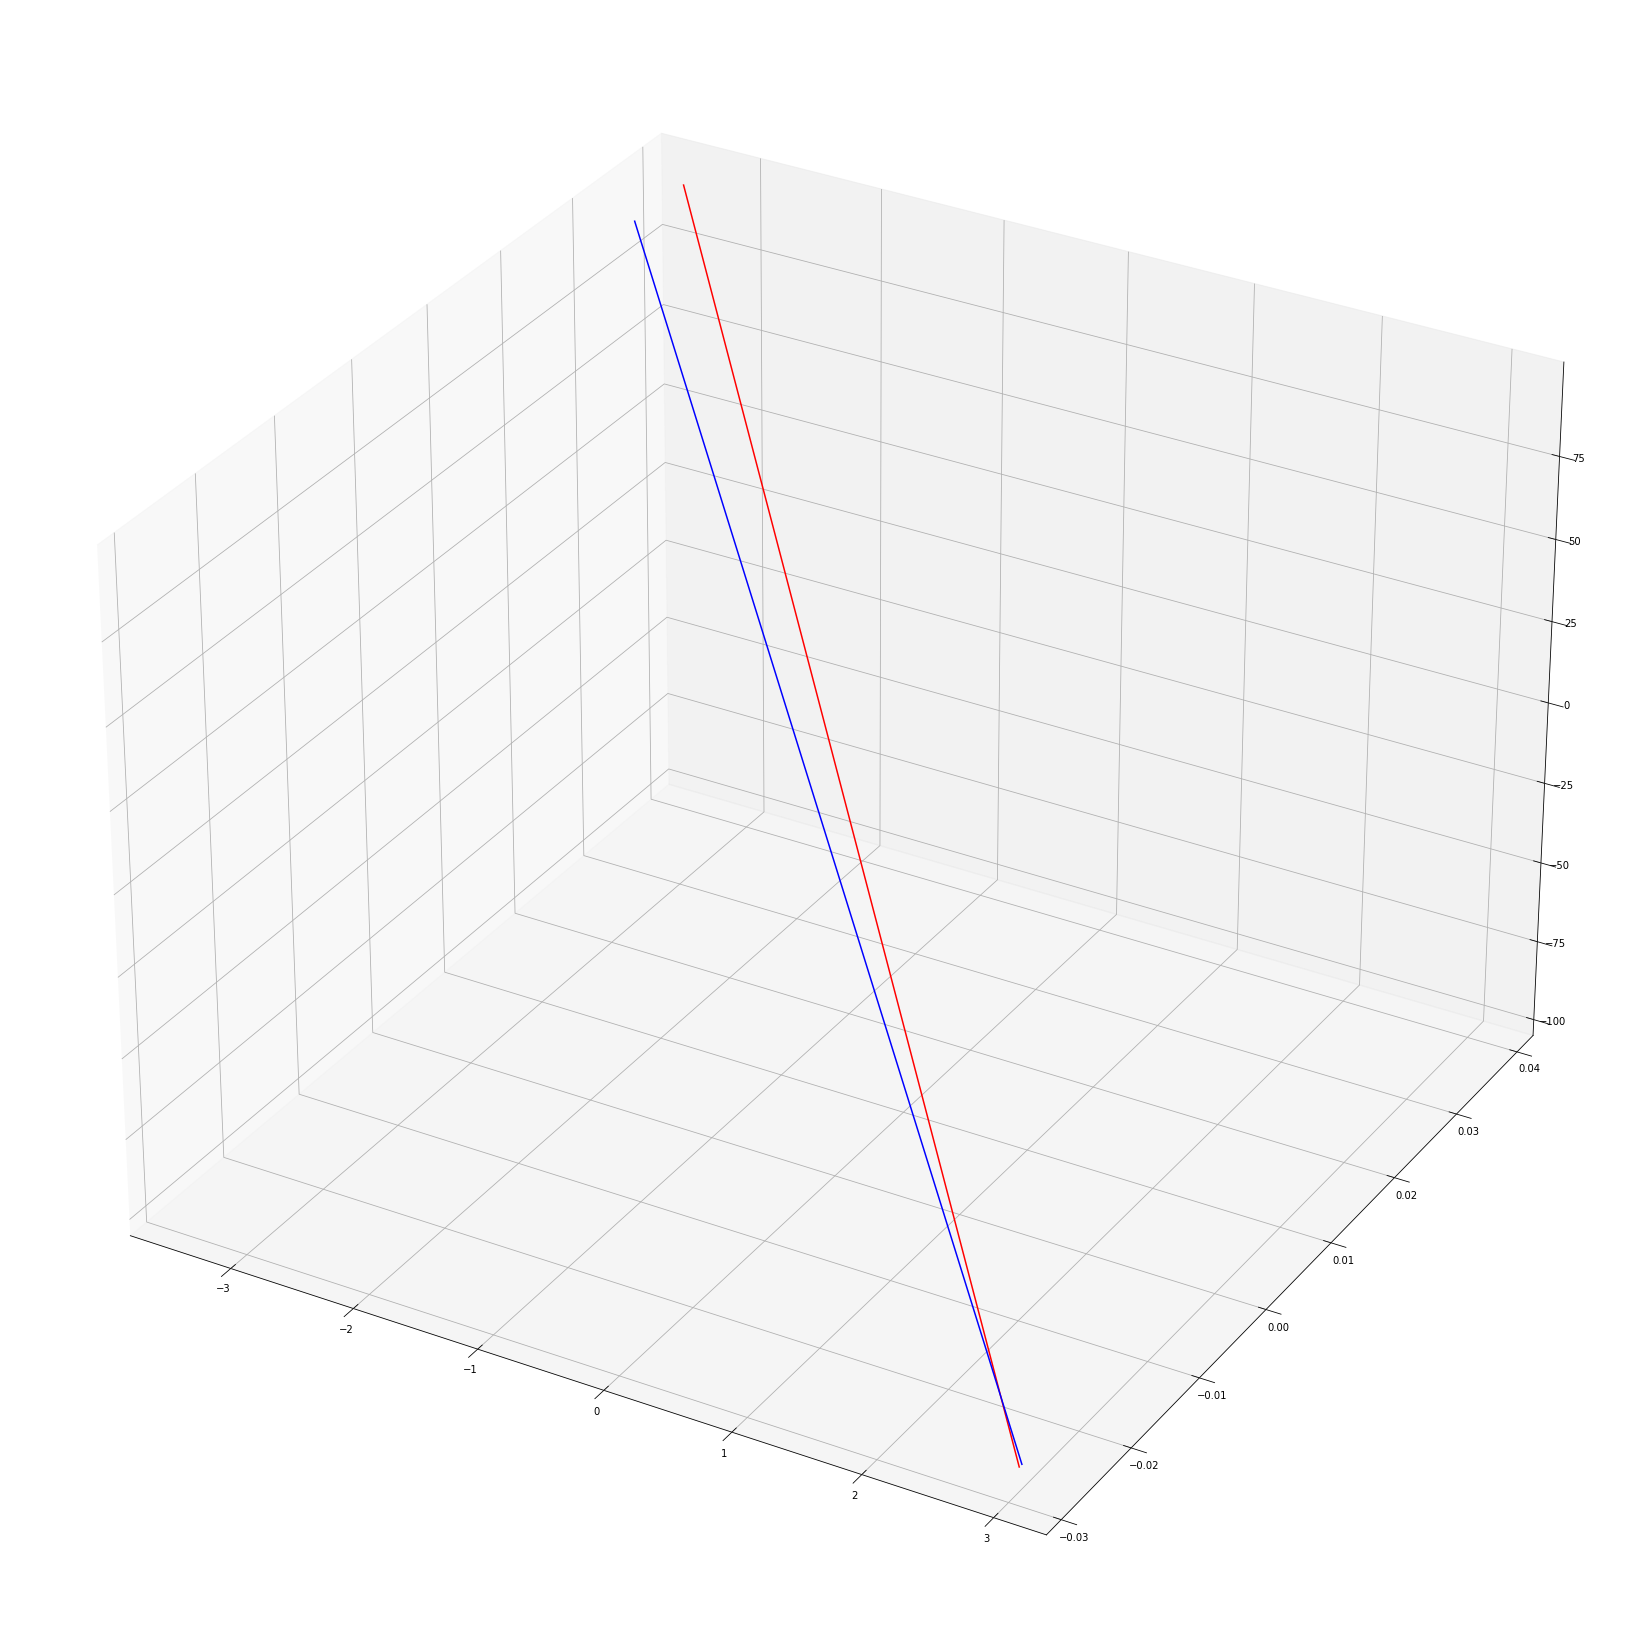

In [578]:
print(p['position'])
print(q['position'])
print(p['direction'])
print(q['direction'])
p0=p['position']-100*p['direction']
p1=p['position']+100*p['direction']
q0=q['position']-100*q['direction']
q1=q['position']+100*q['direction']
r,s=op.lins.two_lines_intersection(p['position'],p['direction'],q['position'],q['direction'])
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
for i in range(1):
    ax.plot([p0[i,0],p1[i,0]],[p0[i,1],p1[i,1]],[p0[i,2],p1[i,2]],'r')
    ax.plot([q0[i,0],q1[i,0]],[q0[i,1],q1[i,1]],[q0[i,2],q1[i,2]],'b')
#    ax.plot([p0[i,0],p1[i,0]],[p0[i,1],p1[i,1]],'r')
#    ax.plot([q0[i,0],q1[i,0]],[q0[i,1],q1[i,1]],'b')
plt.show()

In [79]:
nodes=[]
for obj in a:
    nodes += [node for node in opn.successors(obj)]

In [255]:
np.array([1.,2,3],dtype='float128')

array([1., 2., 3.], dtype=float128)

In [271]:
import numexpr as ne
ne.evaluate("sin(x)",local_dict={'x':np.empty((2,), dtype='float128')})

TypeError: Iterator operand 1 dtype could not be cast from dtype('float128') to dtype('float64') according to the rule 'safe'

(array([5.6964e+04, 2.5216e+04, 1.0668e+04, 4.3880e+03, 1.7710e+03,
        6.6800e+02, 2.2700e+02, 7.2000e+01, 1.9000e+01, 7.0000e+00]),
 array([4.61178292e-07, 4.14136782e-02, 8.28268953e-02, 1.24240112e-01,
        1.65653329e-01, 2.07066546e-01, 2.48479763e-01, 2.89892980e-01,
        3.31306197e-01, 3.72719415e-01, 4.14132632e-01]),
 <BarContainer object of 10 artists>)

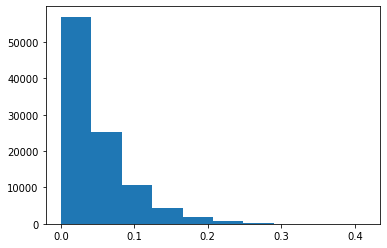

In [305]:
plt.hist(np.random.beta(1,20,size=100000))

In [433]:
np.cross?

Signature: np.cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)
Docstring:
Return the cross product of two (arrays of) vectors.

The cross product of `a` and `b` in :math:`R^3` is a vector perpendicular
to both `a` and `b`.  If `a` and `b` are arrays of vectors, the vectors
are defined by the last axis of `a` and `b` by default, and these axes
can have dimensions 2 or 3.  Where the dimension of either `a` or `b` is
2, the third component of the input vector is assumed to be zero and the
cross product calculated accordingly.  In cases where both input vectors
have dimension 2, the z-component of the cross product is returned.

Parameters
----------
a : array_like
    Components of the first vector(s).
b : array_like
    Components of the second vector(s).
axisa : int, optional
    Axis of `a` that defines the vector(s).  By default, the last axis.
axisb : int, optional
    Axis of `b` that defines the vector(s).  By default, the last axis.
axisc : int, optional
    Axis of `c` contai

In [356]:
np.finfo('float128').resolution

1.0000000000000000715e-18

In [789]:
import warnings
import scipy.linalg as linalg
def two_lines_intersection(r1, u1, r2, u2, in_dtype='float128'):
    """Find line-line intersections or nearest points to skew lines.
    line 1: r = r1 + u1*t
    line 2: r = r2 + u2*t

    r1 and r2 are (N, 3) arrays.
    u1 and u2 are (N, 3) arrays and each row represents a unit vector.

    Returns:
    r - (N, 3) array, each row represents an intersection.
        np.nan returned if the two lines are parallel.
    s - d1**2 + d2**2, where d1 is distance between r and line 1 and
        d2 is distance between r and line 2.
    """
    r1_in = r1.astype(in_dtype)
    u1_in = u1.astype(in_dtype)
    r2_in = r2.astype(in_dtype)
    u2_in = u2.astype(in_dtype)
    U1 = np.eye(3,dtype=in_dtype) - np.matmul(
        np.reshape(u1_in, (-1,3,1)),
        np.reshape(u1_in, (-1,1,3)),
        axes=[(-2,-1), (-2,-1), (-2,-1)])
    U2 = np.eye(3,dtype=in_dtype) - np.matmul(
        np.reshape(u2_in, (-1,3,1)),
        np.reshape(u2_in, (-1,1,3)),
        axes=[(-2,-1), (-2,-1), (-2,-1)])
    A = U1+U2
    b = np.matmul(U1, np.reshape(r1_in,(-1,3,1)), axes=[(-2,-1),(-2,-1),(-2,-1)]) + \
        np.matmul(U2, np.reshape(r2_in,(-1,3,1)), axes=[(-2,-1),(-2,-1),(-2,-1)])
    adjA = np.empty_like(A)
    adjA[:,0,0] = A[:,1,1]*A[:,2,2]-A[:,1,2]*A[:,2,1]
    adjA[:,0,1] = A[:,0,2]*A[:,2,1]-A[:,0,1]*A[:,2,2]
    adjA[:,0,2] = A[:,0,1]*A[:,1,2]-A[:,0,2]*A[:,1,1]
    adjA[:,1,0] = A[:,1,2]*A[:,2,0]-A[:,1,0]*A[:,2,2]
    adjA[:,1,1] = A[:,0,0]*A[:,2,2]-A[:,0,2]*A[:,2,0]
    adjA[:,1,2] = A[:,0,2]*A[:,1,0]-A[:,0,0]*A[:,1,2]
    adjA[:,2,0] = A[:,1,0]*A[:,2,1]-A[:,1,1]*A[:,2,0]
    adjA[:,2,1] = A[:,0,1]*A[:,2,0]-A[:,0,0]*A[:,2,1]
    adjA[:,2,2] = A[:,0,0]*A[:,1,1]-A[:,0,1]*A[:,1,0]
    D = A[:,0,0]*adjA[:,0,0] + \
        A[:,0,1]*adjA[:,1,0] + \
        A[:,0,2]*adjA[:,2,0]
    r = np.empty((D.size, 3), dtype=in_dtype)
    D_is_0 = np.isclose(D, 0., atol=np.finfo(in_dtype).resolution*1e6)
    if np.all(D_is_0):
        warnings.warn(
            "All determinants (max: {:.2E}) are close to zero.".format(
                np.max(np.abs(D))), RuntimeWarning)
    invA = adjA[~D_is_0]/np.reshape(D[~D_is_0],(-1,1,1))
    r[ D_is_0, :] = np.nan
    r[~D_is_0, :] = np.matmul(invA, b[~D_is_0]).reshape((-1,3))
    r1mr = r1_in - r
    r2mr = r2_in - r
    s = np.sum(r1mr**2., axis=-1)-\
        np.sum(r1mr*u1,  axis=-1)**2.+\
        np.sum(r2mr**2., axis=-1)-\
        np.sum(r2mr*u2,  axis=-1)**2.
    return r.astype(r1.dtype), s.astype(r1.dtype), A, b
def dist(r1,u1,r):
    return np.sum((r1-r)**2., axis=-1)-\
        np.sum((r1-r)*u1,  axis=-1)**2.

r1=np.double([1,0,0])
u1=np.double([0,0,1])
r2=np.double([-1,0,0])
u2=op.quat.direction(np.double([1e-8,0,1]))
r,s,A,b=two_lines_intersection(r1,u1,r2,u2,in_dtype='float128')
print(r)
linalg.lstsq(A[0],b[0])

[[nan nan nan]]


/Users/huo/.pyenv/versions/3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: All determinants (max: 2.00E-16) are close to zero.


(array([[ 2.50088252e-17],
        [-1.65436123e-24],
        [-1.25044126e-25]]),
 array([], dtype=float64),
 2,
 array([2.e+00, 2.e+00, 5.e-17]))

In [768]:
dist(r2,u2,np.double([[1,0,2e7]]))

array([-0.1875])

array([[9.99999834e-01],
       [0.00000000e+00],
       [1.99999967e+05]])